In [1]:
import pandas as pd
import numpy as np

In [42]:
# create a small dictionary with different data types

dft = pd.DataFrame(dict(A = np.random.rand(3),
                        B = 1,
                        C = 'foo',
                        D = pd.Timestamp('20010102'),
                        E = pd.Series([1.0]*3).astype('float32'),
                                F = False,
                                G = pd.Series([1]*3,dtype='int8')))

df

,A,B,C,D,E,F,G
0,0.687514,1,foo,2001-01-02,1.0,False,1
1,0.357147,1,foo,2001-01-02,1.0,False,1
2,0.602409,1,foo,2001-01-02,1.0,False,1


In [122]:

df['h'] = '6'
df

,a,b,c,d,h
0,0.088654,-0.717973,-0.350589,1.610712,6
1,0.338653,-0.067284,-1.382781,-0.700844,6
2,2.953183,1.403213,0.265085,0.945102,6
3,-0.483310,0.821644,-0.382954,-0.726837,6
4,-2.373561,0.510135,0.603101,0.229302,6


In [3]:
# There is a really easy way to see what kind of dtypes 
# are in each column. 

dft.dtypes

A           float64
B             int64
C            object
D    datetime64[ns]
E           float32
F              bool
G              int8
dtype: object

In [10]:
# If a pandas object contains data multiple dtypes IN A 
# SINGLE COLUMN, the dtype of the column will be chosen 
# to accommodate all of the data types (object is the 
# most general).
# these ints are coerced to floats

pd.Series([1, 2, 3, 4, 5, 6.])

0    1
1    2
2    3
3    4
4    5
5    6
dtype: float64

In [11]:
# string data forces an ``object`` dtype

pd.Series([1, 2, 3, 6., 'foo'])

0      1
1      2
2      3
3      6
4    foo
dtype: object

In [46]:
# The method get_dtype_counts() will return the number 
# of columns of each type in a DataFrame:

dft.get_dtype_counts()

bool              1
datetime64[ns]    1
float32           1
float64           1
int64             1
int8              1
object            1
dtype: int64

In [50]:
# create a small data frame. 

df = pd.DataFrame(np.random.randn(5, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.088654,-0.717973,-0.350589,1.610712
1,0.338653,-0.067284,-1.382781,-0.700844
2,2.953183,1.403213,0.265085,0.945102
3,-0.483310,0.821644,-0.382954,-0.726837
4,-2.373561,0.510135,0.603101,0.229302


In [51]:
# Use df.apply to find the square root of all the values. 
# NaN means not a number

df.apply(np.sqrt)


,a,b,c,d
0,0.297748,NaN,NaN,1.269138
1,0.581939,NaN,NaN,NaN
2,1.718483,1.184573,0.514864,0.972164
3,NaN,0.906446,NaN,NaN
4,NaN,0.714237,0.776596,0.478855


In [58]:

df.apply(np.mean, axis=0)

,a,b,c,d
0,0.088654,-0.717973,-0.350589,1.610712
1,0.338653,-0.067284,-1.382781,-0.700844
2,2.953183,1.403213,0.265085,0.945102
3,-0.483310,0.821644,-0.382954,-0.726837
4,-2.373561,0.510135,0.603101,0.229302


In [72]:
# find the mean of all of the columns

df.apply(np.std, axis=0)

a    1.712097
b    0.729940
c    0.678834
d    0.915548
dtype: float64

In [68]:
# find the mean of all of the rows

df.apply(np.mean)

a    0.104724
b    0.389947
c   -0.249628
d    0.271487
dtype: float64

In [74]:
# Let's create a random array with 50 numbers, ranging 
# from 0 to 7.

data = np.random.randint(0, 7, size = 50)
data

array([3, 2, 1, 1, 0, 0, 4, 4, 3, 1, 6, 2, 4, 1, 5, 2, 4, 1, 5, 0, 3, 5, 4,
       5, 3, 3, 3, 5, 1, 5, 4, 4, 6, 1, 4, 1, 3, 2, 2, 5, 4, 1, 6, 6, 4, 5,
       3, 0, 2, 0])

In [77]:
# convert the array into a series

s = pd.Series(data)


In [86]:
# How many of each number is there in the series? Enter 
# value_counts()

pd.value_counts(s[::3])

5    5
4    3
3    3
1    3
2    2
6    1
dtype: int64

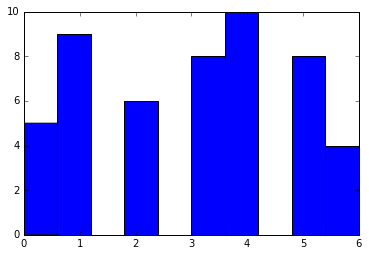

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(s)
plt.show()

In [97]:
rs = pd.read_csv('/Users/smoot/Desktop/ga/sales_info.csv')
rs.head()

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales
0,18.420760,93.802281,337166.53,337804.05
1,4.776510,21.082425,22351.86,21736.63
2,16.602401,93.612494,277764.46,306942.27
3,4.296111,16.824704,16805.11,9307.75
4,8.156023,35.011457,54411.42,58939.90


In [132]:
df.a.apply(lambda a: a + 1)
df
df.b = df.b+1
df

,a,b,c,d,h
0,2.088654,0.282027,-0.350589,1.610712,6
1,2.338653,0.932716,-1.382781,-0.700844,6
2,4.953183,2.403213,0.265085,0.945102,6
3,1.516690,1.821644,-0.382954,-0.726837,6
4,-0.373561,1.510135,0.603101,0.229302,6


In [100]:
rs.apply(np.mean)

volume_sold          10.018684
2015_margin          46.858895
2015_q1_sales    154631.668200
2016_q1_sales    154699.178750
dtype: float64

In [102]:
rs1 = rs.copy()

In [125]:
rs1.eval('volume_sold = volume_sold+1')
rs1.eval('volume_sold = volume_sold+3')
rs1

/Users/smoot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: eval expressions containing an assignment currentlydefault to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  if __name__ == '__main__':
/Users/smoot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: eval expressions containing an assignment currentlydefault to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  from ipykernel import kernelapp as app


,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales,bonus
0,29.420760,93.802281,337166.53,337804.05,smoot
1,15.776510,21.082425,22351.86,21736.63,smoot
2,27.602401,93.612494,277764.46,306942.27,smoot
3,15.296111,16.824704,16805.11,9307.75,smoot
4,19.156023,35.011457,54411.42,58939.90,smoot
5,16.005122,31.877437,255939.81,332979.03,smoot
6,25.606750,76.518973,319020.69,302592.88,smoot
7,15.456466,19.337345,45340.33,55315.23,smoot
8,16.047530,26.142470,57849.23,42398.57,smoot
9,16.388070,22.427024,51031.04,56241.57,smoot


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1180aec90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1182cb550>]], dtype=object)

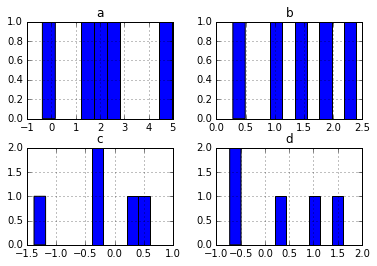

In [133]:
df.hist()